# Problem Statement:
The datasets contains details of applicant applied for loan where the aim is to predict the Loan Approval possibilty for those applicants based on given input variables.

# Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 5 ML algo used from  sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

# Loading dataset

In [11]:
loan = pd.read_csv('Loan Prediction.csv')

# Creating new Dataframe

In [12]:
df=pd.DataFrame(loan)
df.head(12)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [13]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- Obs : Dropping Loan Id Col which is of least significant

In [14]:
df.shape

(614, 12)

- Dataset has 614 rows & 12 Cols.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


- datasets has 4 float variables, 1 int variable & 7 object variables.
- Index 0 is Gender col & Index 11 is Loan_status col

In [16]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- Datasets has float,int & object variables.

In [17]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Both object & continous variables having missing values.
- Objects Missing value is treated in Objects dataframe after separating datasets into numeric & objects.
- Numeric missing value is treated after labelencoded dataframe.
- Gender,Dependents,Self_Employed Objects Variables shows Missing Values.

In [18]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

- Target Col has Class imbalance problem which is treated later.
- Target Col showing loan status as Y has hisghest value of 422.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

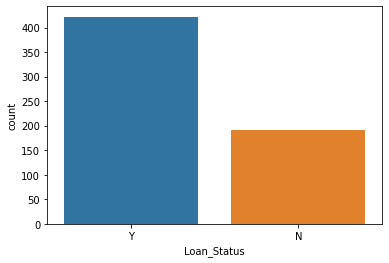

In [19]:
sns.countplot(df['Loan_Status'])

- Target Col has Class imbalance problem which is treated later.
- Target Col showing loan status as Y has hisghest value of 422.

In [20]:
numerics = ['float64', 'int64']
numeric = df.select_dtypes(include=numerics)
objects = df.select_dtypes(exclude=numerics)

-Datasets is divided into numerics & Objects for better EDA

In [21]:
objects.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


- Objects dataframe shows only objects variables including target col

In [22]:
objects.describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


-  Target cols has 2 unique class Y & N where class Y has hieghest value.
-  Dependent cols has 4 unique class where the dependents is 0 for loan approval.
-  Similar analysis can be made for other variables.

In [23]:
numeric.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


-  There are 5 Numeric Variables in Numeric dataframe.
-  Mean is greater then 50% percentile in Applicantincome col also std is high.
-  There is hughe diff in Max & 75th Percentile in Applicantincome & LoanAmount Col.
-  The Number of rows in Loanamount,Loan_amount_term & Credit_History col is 592,600 & 564.
-  As per above obs it seems those cols datsets has skewness, outliers & Missing Values.

# Countplot for Categorical variables

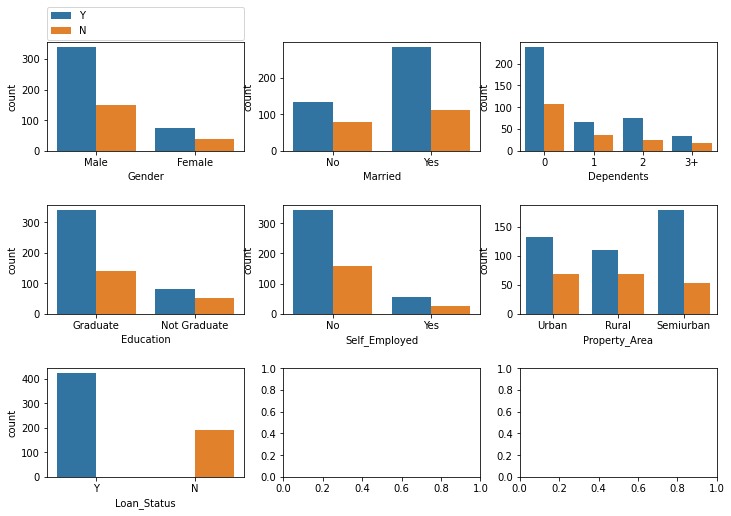

In [24]:
fig,ax =plt.subplots(3,3,figsize=(12,8))
fig.subplots_adjust(hspace=.5)
for i in range(0,7):
    g = sns.countplot(x=objects.iloc[:,i], hue=objects["Loan_Status"], ax=ax[divmod(i,3)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()

- Gender col has two class male & female where male count is more then female class.
- Also %age Loan_status as Y in male class is high.
- Married couple count is more 
- The Count of 0 dependents is high as compared to no of dependents.
- For loan application there are more person who are graduate's.
- Self employed person are less.
- More application seen for semiurban area.
- Loan status Y count is more then N.

# Missing Value in Objects dataframe

In [25]:
objects.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

- Gender,Dependents & Self_Employed has missing value.

In [26]:
objects['Gender'].fillna(objects['Gender'].value_counts().idxmax(),inplace=True)
objects['Married'].fillna(objects['Married'].value_counts().idxmax(),inplace=True)
objects['Dependents'].fillna(objects['Dependents'].value_counts().idxmax(),inplace=True)
objects['Self_Employed'].fillna(objects['Self_Employed'].value_counts().idxmax(),inplace=True)

- Missing value is treated with frequency counts as above

In [27]:
objects.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

- No Missing value seen in object cols after treatment.

# Labelencoder

In [28]:
# categorical variable encoding
cat_vars_list = objects.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

- All objects/cat variables is label encoded
- The same is fitted back into dataframe as seen below.

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


- The dataframe shows labelencoded objects variables for further treatment and analysis.

In [30]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Numeric cols (LoanAmount,Loan_Amount_Term & Credit_History) has missing value which is treated below as per the distribution of data.

In [31]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

- As all three numeric col which has missing value are normaly distributed, hence missing value will be replaced by median.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

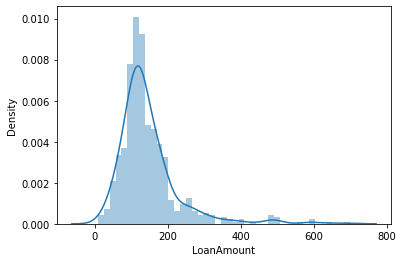

In [32]:
sns.distplot(df['LoanAmount'])

-  Loanamount col is rt skewed & not normal distributed

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

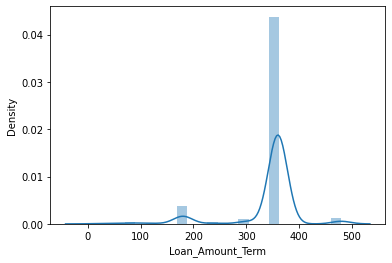

In [33]:
sns.distplot(df['Loan_Amount_Term'])

- Loan_Amount_Term is left skewed and also not normal distributed

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

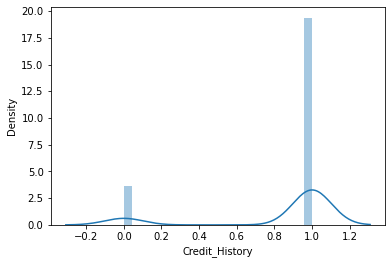

In [34]:
sns.distplot(df['Credit_History'])

- Credit_History is also left skewed and not normaly distributed

In [35]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())

- All three numeric has skewness and data is also not normal so missing value is replaced by median

In [36]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- The missing value is replace by median in numeric col and now the there is no missing value present in dataframe.

# Histogram

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>],
       [<AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>]], dtype=object)

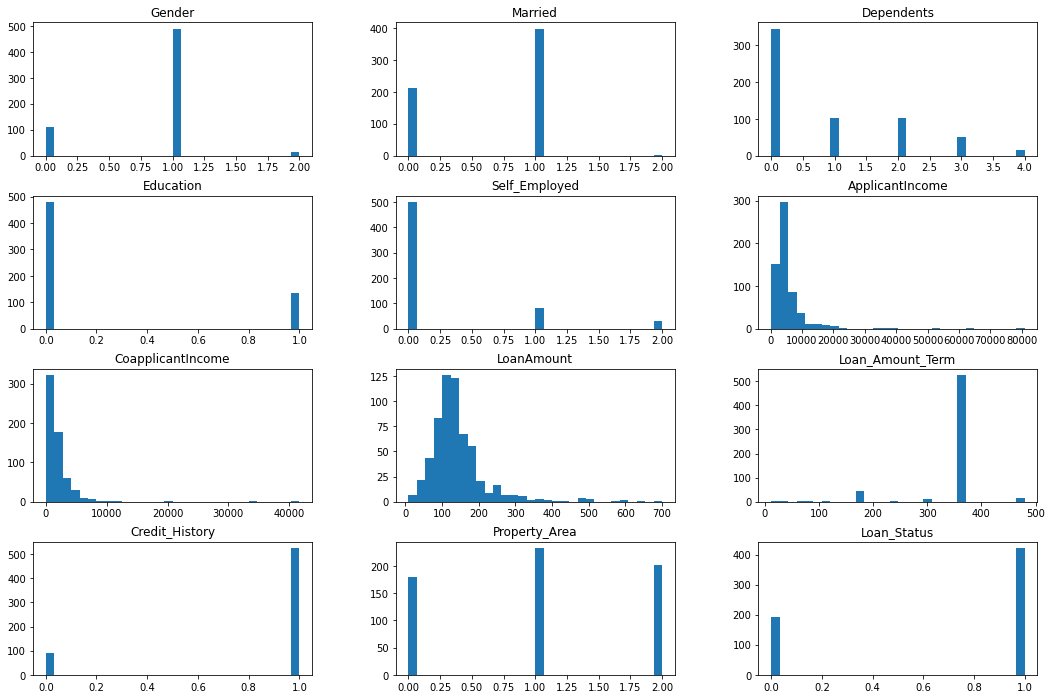

In [37]:
df.hist(grid=False, figsize=(18,12), bins=30)

- Loanamount col is rt skewed & not normal distributed.
- Loan_Amount_Term is left skewed and also not normal distributed.
- Credit_History is also left skewed and not normaly distributed.

# Disstplot

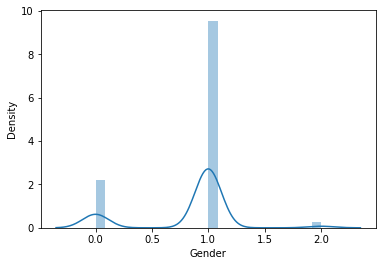

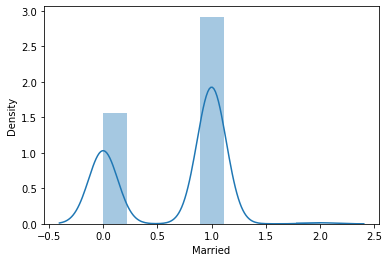

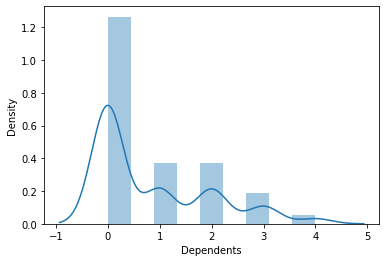

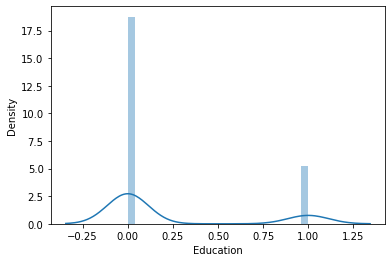

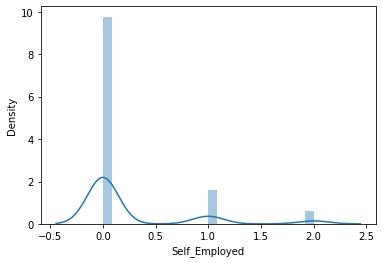

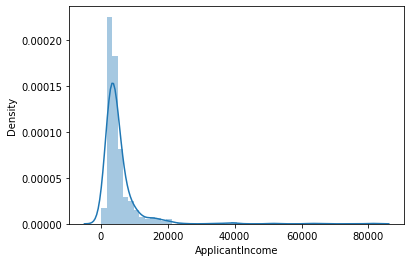

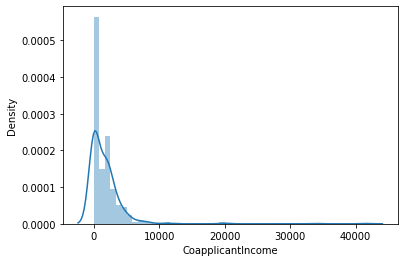

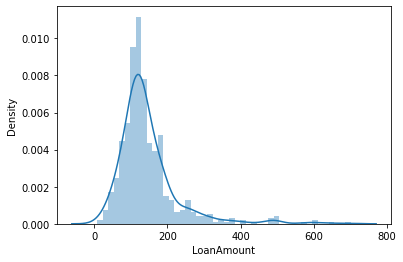

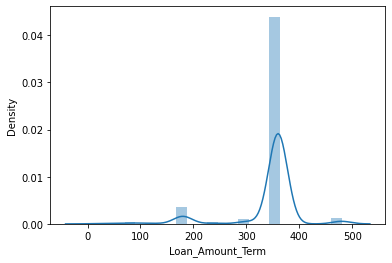

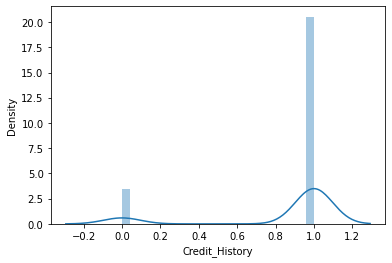

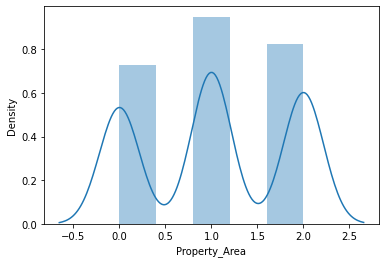

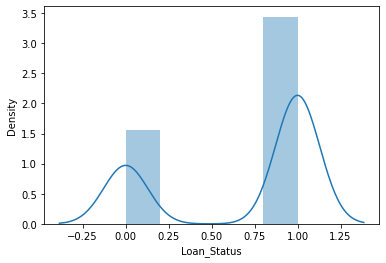

In [38]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- Loanamount col is rt skewed & not normal distributed.
- Loan_Amount_Term is left skewed and also not normal distributed.
- Credit_History is also left skewed and not normaly distributed.

# Pairplot

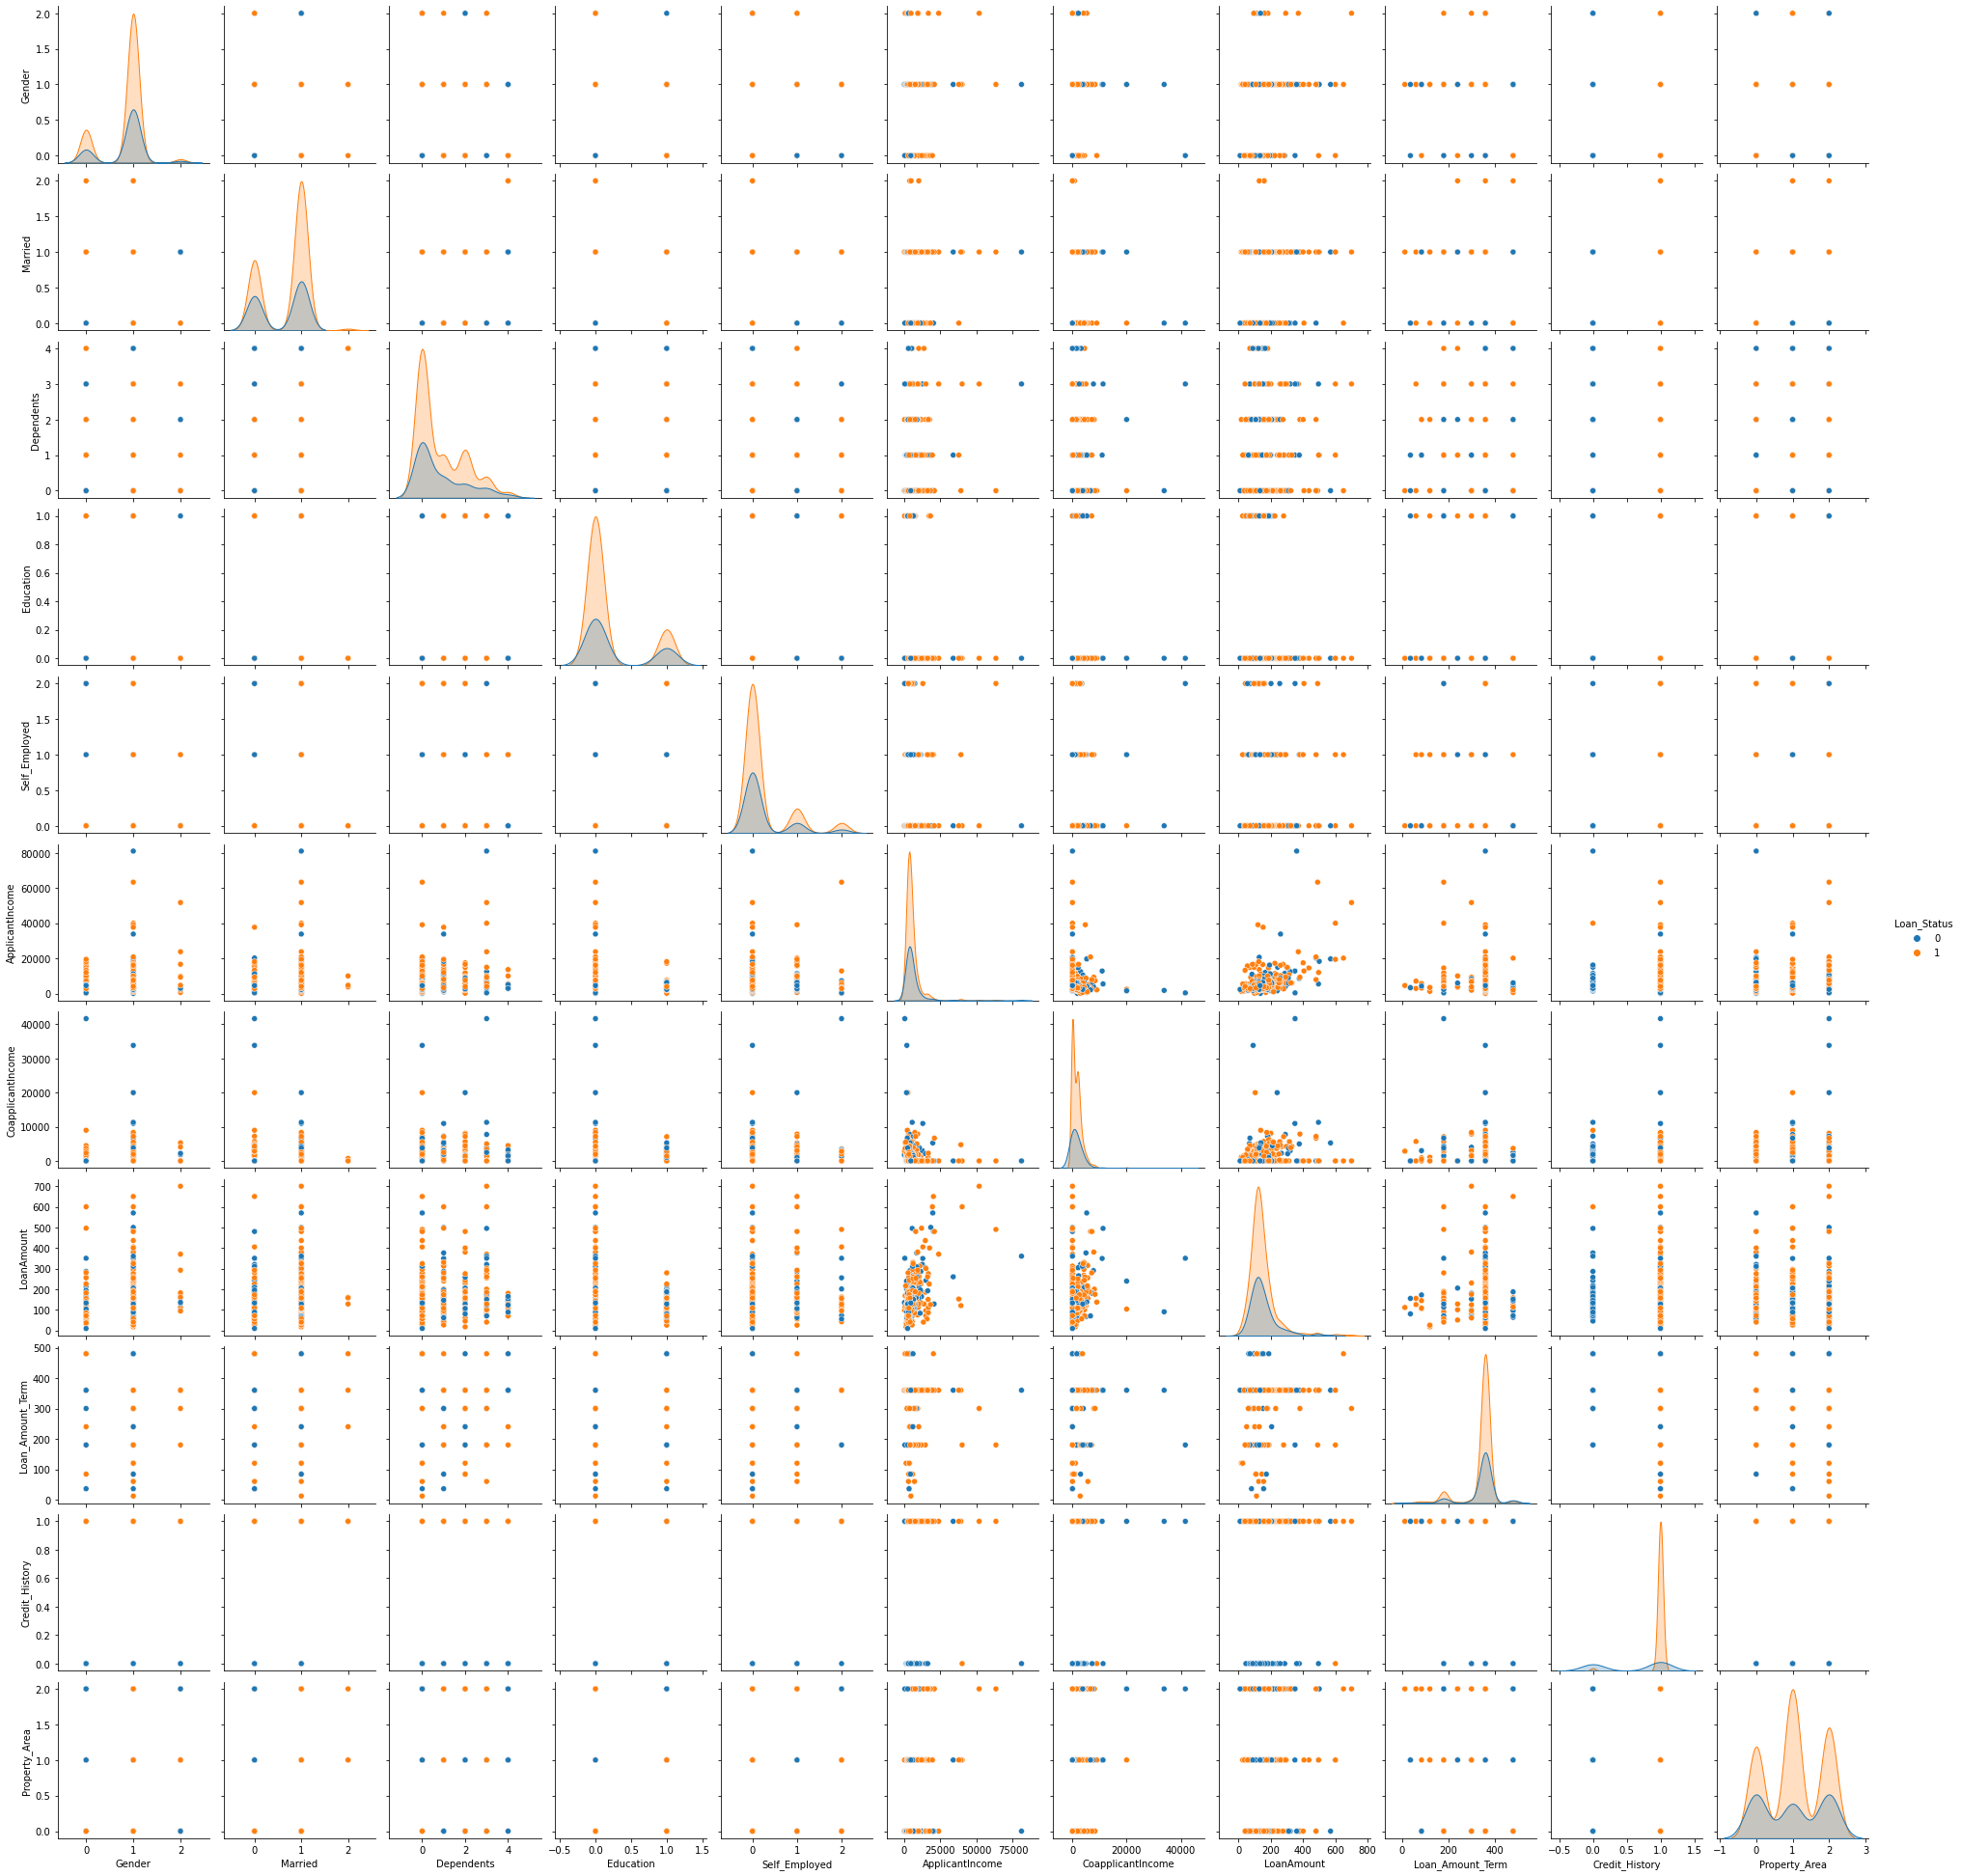

In [39]:
sns.pairplot(df,hue="Loan_Status")

- The data is non linear & not normaly distributed.

# Boxplot for outliers detection

<AxesSubplot:>

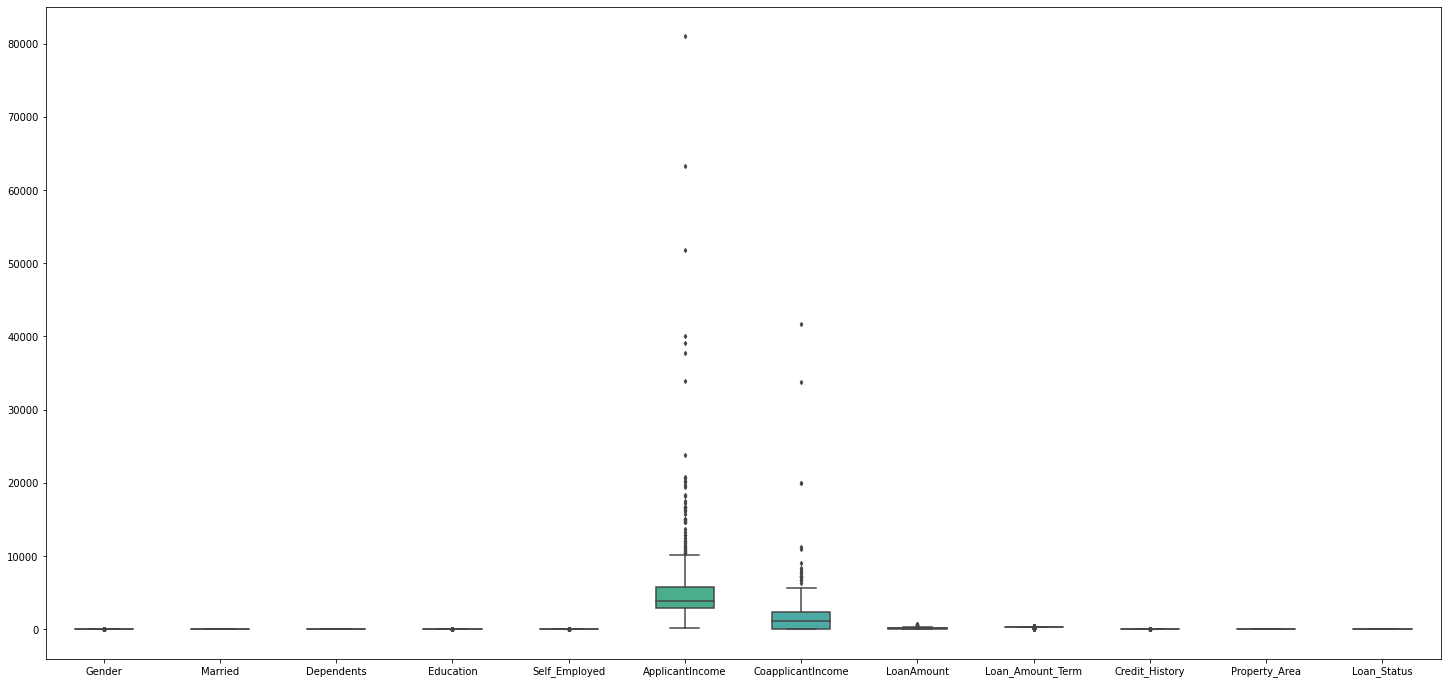

In [40]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- ApplicantIncome,CoapplicantIncome & LoanAmount Variables has high amount of outliers.

# Correlation

In [41]:
dfcor=df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.135505,-0.068522,-0.003844,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.144297,-0.096368,0.014896,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.128868,-0.075159,-0.082888,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089886,-0.036361,0.062019,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.135505,0.144297,0.128868,-0.168759,0.089886,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.068522,-0.096368,-0.075159,-0.073928,-0.036361,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,-0.003844,0.014896,-0.082888,-0.073658,0.062019,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


- Target variable-Loan_status shows +ve corr with Credit_history col & -ve corr with almost all remaining variables.
- Applicantincome shows +ve corr with Loanamount.
- Similar obs can be drawn for remaining variables.

# Heatmap

<AxesSubplot:>

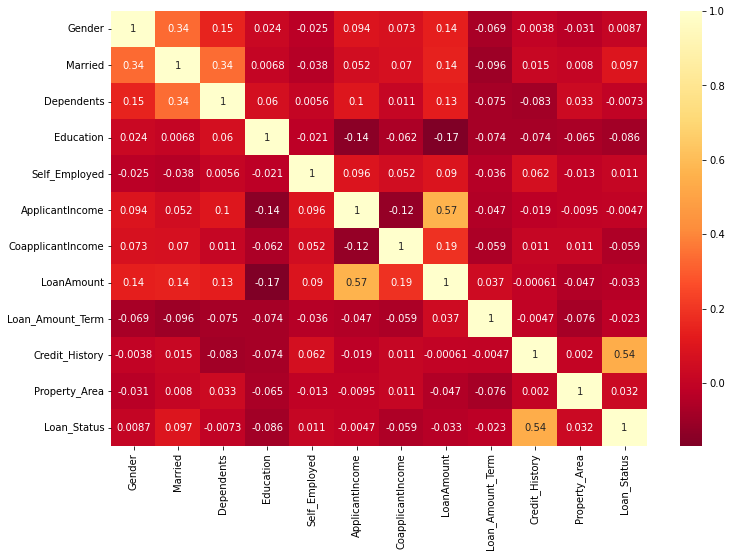

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

- Target variable-Loan_status shows +ve corr with Credit_history col & -ve corr with almost all remaining variables.
- Applicantincome shows +ve corr with Loanamount.
- Similar obs can be drawn for remaining variables.

# VIF to test multicollinearity 

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [45]:
vif_calc()

    VIF Factor           features
0     5.360754             Gender
1     3.610140            Married
2     1.813245         Dependents
3     1.305655          Education
4     1.221570      Self_Employed
5     2.896114    ApplicantIncome
6     1.491314  CoapplicantIncome
7     6.773089         LoanAmount
8    10.194432   Loan_Amount_Term
9     9.143532     Credit_History
10    2.584253      Property_Area
11    4.633130        Loan_Status


- Loan_amount_term & Credit_history has high VIF value greater then 8.
- But I have not deleted those cols as they are influencing target cols, Also total cols in datasets is also less.

# Z-Score Removing Outliers

In [46]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
       126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
       218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
       336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
       447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
       575, 579, 581, 585, 600, 600, 601, 604], dtype=int64), array([6, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 5, 7, 8, 5, 7, 4, 4, 5, 7,
       6, 7, 5, 5, 4, 4, 4, 8, 8, 4, 7, 4, 7, 8, 4, 5, 7, 4, 4, 7, 4, 4,
       4, 6, 5, 4, 6, 4, 7, 5, 4, 4, 4, 7, 8, 8, 7, 7, 7, 4, 4, 8, 7, 8,
       4, 6, 8, 4, 6, 4, 7], dtype=int64))


In [47]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (548, 12)


- The outliers are removed as no of rows reduced to 548 from 614 rows.
- The outliers value greater then 3 std is removed.

In [48]:
Data_loss=((614-548)/908)*100

In [49]:
Data_loss

7.268722466960352

- the percentage data loss is less then 8% percent after removing outliers.

# Removing Right Skewness

In [50]:
numeric.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

- ApplicantIncome,CoapplicantINcome & LoanAmount col is rt skewed & not normal distributed.
- Loan_Amount_Term is left skewed and also not normal distributed.
- Credit_History is also left skewed and not normaly distributed.

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      1.228783
CoapplicantIncome    1.369775
LoanAmount           1.140938
Loan_Amount_Term    -2.050599
Credit_History      -1.910659
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

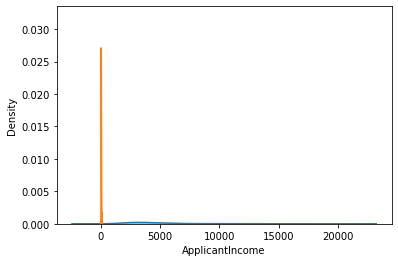

In [51]:
import numpy as np
sns.distplot(df['ApplicantIncome'])
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])
df.skew()

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      0.721491
CoapplicantIncome    1.369775
LoanAmount           1.140938
Loan_Amount_Term    -2.050599
Credit_History      -1.910659
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

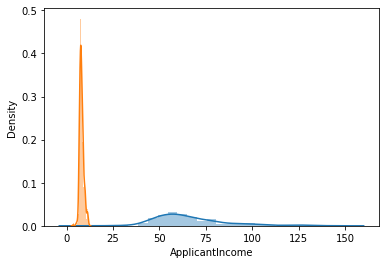

In [52]:
import numpy as np
sns.distplot(df['ApplicantIncome'])
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])
df.skew()

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      0.721491
CoapplicantIncome    0.228178
LoanAmount           1.140938
Loan_Amount_Term    -2.050599
Credit_History      -1.910659
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

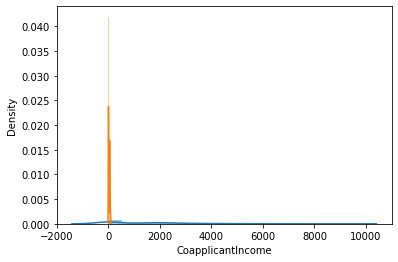

In [53]:
import numpy as np
sns.distplot(df['CoapplicantIncome'])
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncome'])
df.skew()

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      0.721491
CoapplicantIncome    0.228178
LoanAmount           0.358604
Loan_Amount_Term    -2.050599
Credit_History      -1.910659
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

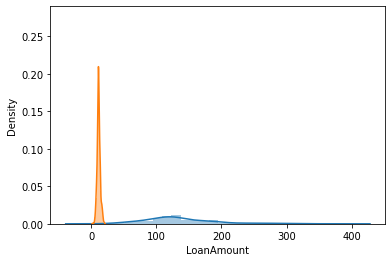

In [54]:
import numpy as np
sns.distplot(df['LoanAmount'])
df['LoanAmount']=np.sqrt(df['LoanAmount'])
sns.distplot(df['LoanAmount'])
df.skew()

- Multiple time sqrt method is applied to (ApplicantIncome,CoapplicantINcome & LoanAmount) cols to remove +ve or rt skewness as can be seen above.
- Which  reduced the +ve skeweness in those variables.
- Power transform method will be applied later as Loan_Amount_Term & credit_history has left skeweness in data. 

# Class Imbalnce treatment for target col.

In [55]:
df['Loan_Status'].value_counts()

1    377
0    171
Name: Loan_Status, dtype: int64

- 1 is Loan_status as Y
- 0 is Loan_status as N which will be upsampled to the same level of 1

In [56]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

- dataset is divide into indepndent & target variables.
- x is a independent variables & y is a target variable

In [57]:
x.shape

(548, 11)

- x has 548 rows & 11 Cols

In [58]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.745213,0.000000,11.313708,360.0,1.0,2
1,1,1,1,0,0,8.227871,38.832976,11.313708,360.0,1.0,0
2,1,1,0,0,1,7.400828,0.000000,8.124038,360.0,1.0,2
3,1,1,0,1,0,7.129041,48.559242,10.954451,360.0,1.0,2
4,1,0,0,0,0,8.801117,0.000000,11.874342,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.338368,0.000000,8.426150,360.0,1.0,0
610,1,1,3,0,0,8.004878,0.000000,6.324555,180.0,1.0,0
611,1,1,1,0,0,9.478624,15.491933,15.905974,360.0,1.0,2
612,1,1,2,0,0,9.331689,0.000000,13.674794,360.0,1.0,2


- x without target col.

In [59]:
df['Loan_Status'].value_counts()

1    377
0    171
Name: Loan_Status, dtype: int64

1 = Y
0 = N

In [60]:
from sklearn.utils import resample

- Importing resample class 

In [61]:
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)

- Combining both x & y again for balancing target col class.

In [62]:
y = x[x.Loan_Status==1] # y instance
n = x[x.Loan_Status==0] # N instance

In [63]:
# upsample minority
dia_upsampled = resample(n,
                          replace=True, # sample with replacement
                          n_samples=len(y),   # match number in majority
                          random_state=27)  # reproducible results

- N class is upsampled above

In [64]:
upsampled = pd.concat([y, dia_upsampled])

- Combining Y class with upsampled N class

In [65]:
upsampled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.745213,0.000000,11.313708,360.0,1.0,2,1
2,1,1,0,0,1,7.400828,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,7.129041,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,8.801117,0.000000,11.874342,360.0,1.0,2,1
5,1,1,2,0,1,8.579060,64.776539,16.340135,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
464,1,0,0,0,0,8.033963,0.000000,9.899495,360.0,0.0,1,0
396,0,0,0,0,0,7.509427,0.000000,8.426150,360.0,0.0,2,0
300,1,1,0,1,0,6.513556,54.166410,9.643651,360.0,0.0,2,0
180,1,1,1,0,0,8.944272,85.146932,13.416408,360.0,0.0,2,0


- Now upsampled is new dataframe after upsampling from which again x & y will be divided.

In [66]:
upsampled['Loan_Status'].value_counts()

1    377
0    377
Name: Loan_Status, dtype: int64

- The target col class is equally balanced as can be seen above.

In [67]:
x = upsampled

- x is remapped to upsampled dataframe

In [68]:
x['Loan_Status'].value_counts()

1    377
0    377
Name: Loan_Status, dtype: int64

- target col class is balanced in x 

In [69]:
x=upsampled.drop("Loan_Status",axis=1)
y=upsampled["Loan_Status"]

- x without target col

In [70]:
x.shape

(754, 11)

- x with 754 rows & 11 col.
- the number of rows is increased after upsampling.

In [71]:
y.shape

(754,)

- y with same 754 rows as target col.

In [72]:
x.skew()

Gender              -0.905937
Married             -0.536418
Dependents           1.157390
Education            1.081131
Self_Employed        2.072164
ApplicantIncome      0.616535
CoapplicantIncome    0.337595
LoanAmount           0.286225
Loan_Amount_Term    -1.769251
Credit_History      -1.289479
Property_Area       -0.116490
dtype: float64

- As loan_amount_term & credit_history has -ve or left skewed data power tranform method is applied below to remove left skewness

# Left Skewness in Loan Amount & Credit History.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

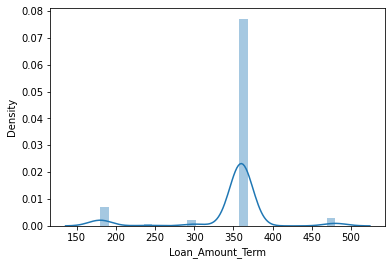

In [73]:
sns.distplot(x['Loan_Amount_Term'])

- Obs : Presence of some -ve skewness in this variable.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

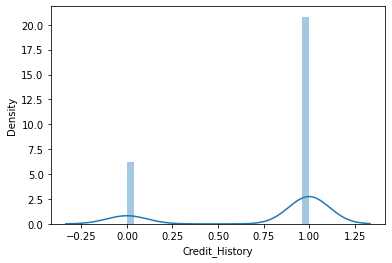

In [74]:
sns.distplot(x['Credit_History'])

- Obs : plot shows left skewness present in this variable

# Power transform to remove remaining -ve & +ve Skewness

In [75]:
from sklearn.preprocessing import power_transform # Importing power tranform
x=power_transform(x,method='yeo-johnson') # Applying power transform to whole dataframe

- Obs: Loan_Amount_Term & Credit_History shows -ve skewness also also some variasbles shows some +ve skewness in x dataframe.

# Scaling

In [76]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 0.34448781, -1.32761408, -0.84583113, ...,  0.11810097,
         0.54567617,  1.13788798],
       [ 0.34448781,  0.69880712, -0.84583113, ...,  0.11810097,
         0.54567617,  1.13788798],
       [ 0.34448781,  0.69880712, -0.84583113, ...,  0.11810097,
         0.54567617,  1.13788798],
       ...,
       [ 0.34448781,  0.69880712, -0.84583113, ...,  0.11810097,
        -1.83258874,  1.13788798],
       [ 0.34448781,  0.69880712,  0.77030325, ...,  0.11810097,
        -1.83258874,  1.13788798],
       [ 0.34448781,  0.69880712,  1.25007011, ...,  0.11810097,
         0.54567617, -1.33873957]])

- Standard Scaler is applied to x independent variables to make all vaues in same range.

In [77]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

84.73895582329317 at random_state 0
88.75502008032129 at random_state 1
83.13253012048193 at random_state 2
82.32931726907631 at random_state 3
84.33734939759037 at random_state 4
86.34538152610442 at random_state 5
83.13253012048193 at random_state 6
85.14056224899599 at random_state 7
83.93574297188755 at random_state 8
80.72289156626506 at random_state 9
81.52610441767068 at random_state 10
81.52610441767068 at random_state 11
85.54216867469879 at random_state 12
83.13253012048193 at random_state 13
82.73092369477911 at random_state 14
89.95983935742971 at random_state 15
79.51807228915662 at random_state 16
87.55020080321285 at random_state 17
85.54216867469879 at random_state 18
85.54216867469879 at random_state 19
79.51807228915662 at random_state 20
86.74698795180723 at random_state 21
84.73895582329317 at random_state 22
82.73092369477911 at random_state 23
82.32931726907631 at random_state 24
84.73895582329317 at random_state 25
79.91967871485943 at random_state 26
85.14056224

- Obs DTC is set for 200 random state out of which best random state will be selected.

In [78]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9074889867841409  on Random_state  35


-Obs : Above code is used to select best random sate out of 200 random state which is 35 with accuracy of 90%

# Splitting dataset in train & test

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 35)

- 70% data used to train the model
- 30% data used to test & predict the model on test data.
- Best random state used is 35

# Logistic Regression¶

In [80]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


# Obs : Logistic Regression is giving 76% Accuracy

[1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1
 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0
 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 0]
0.7444933920704846
              precision    recall  f1-score   support

           0       0.88      0.60      0.71       120
           1       0.67      0.91      0.77       107

    accuracy                           0.74       227
   macro avg       0.77      0.75      0.74       227
weighted avg       0.78      0.74      0.74       227



- Obs Logistic regr acc = 74%

# Decison tree Classifier

In [81]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

0.9162995594713657
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       120
           1       0.97      0.85      0.91       107

    accuracy                           0.92       227
   macro avg       0.92      0.91      0.92       227
weighted avg       0.92      0.92      0.92       227



- Obs DTC acc = 92%

# Random Forest Classifier

In [82]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

0.9295154185022027
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       120
           1       0.95      0.90      0.92       107

    accuracy                           0.93       227
   macro avg       0.93      0.93      0.93       227
weighted avg       0.93      0.93      0.93       227



- Obs RFC acc = 93%

# Support Vector Classifier

In [83]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


0.801762114537445
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       120
           1       0.76      0.85      0.80       107

    accuracy                           0.80       227
   macro avg       0.80      0.80      0.80       227
weighted avg       0.81      0.80      0.80       227



- Obs SVC acc = 80%

# KNN Classifier

In [84]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 78% accuracy on y test data

0.7841409691629956
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       120
           1       0.77      0.78      0.77       107

    accuracy                           0.78       227
   macro avg       0.78      0.78      0.78       227
weighted avg       0.78      0.78      0.78       227



- Knn acc = 78%

# K-Fold Cross validation

In [85]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [86]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [87]:
print(cross_val_score(lg,x,y,cv=cross_validation).mean()) # Logistic regression CV o/p

0.7081236203090507


In [88]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.8621192052980133


In [89]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.9018719646799116


In [90]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Classifier  CV o/p

0.7771832229580574


In [91]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.75201766004415


- KNN is the best model as it has least diff value between Knn Acc - CV value = 78-75.20 = 2.8
- As SVC is having least diff with value = 2.3, but I was facing issue to get ROC Curve, Hence I have selected Knn as the second least diff value as my Best Model.

# GridSearch CV & Hyperparameter Tuning.

In [109]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

# GridSearch CV & Hyperparameter Tuning.

In [110]:
import numpy as np
parameter = {'n_neighbors' : [1,2,4,5],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree'],
            'leaf_size': [30],
            'metric':['minkowski']}

- Hyperparameter is set with multiple values to select the best one through GridsearchCV

In [111]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=cross_validation)

-Obs : Applying Gridsearch to best model random forest classifier 

In [112]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'n_neighbors': [1, 2, 4, 5],
                         'weights': ['uniform', 'distance']})

- Grid search CV applied to the Training Dataset 

In [113]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'weights': 'uniform'}

- Best Parameter is selected from grid search CV which is 
- (algorithm = 'auto', leaf_size = 30,metric= 'minkowski',n_neighbors = 1,weights= 'uniform')

# Best Model Selected is Knn Classifier

In [114]:
Final_mod = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30,metric= 'minkowski',n_neighbors = 1,weights= 'uniform')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.22466960352423


-Obs :  Final Accuracy of the best model = 87.22

# Importing Roc Curve & Ruc Curve Score

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# AUC-ROC Curve

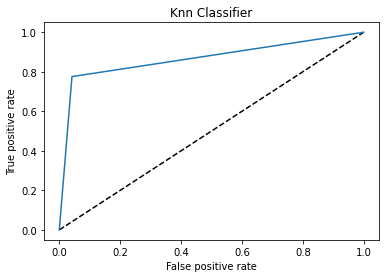

0.8670171339563862

In [118]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Knn Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Knn Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

ObS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

# Exporting Model with Joblib Library

In [119]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

- Model is exported as .pkl file